In [15]:
#Imports etc
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from math import sqrt

In [16]:
ee=np.loadtxt("ee.txt")
mumu=np.loadtxt("mumu.txt")
emu=np.loadtxt("emu.txt")
Events=np.loadtxt("EventsNew.txt")

Last time we may have seen hints of new, heavy particles by looking at oposite sign di-leptons.  Because of momentum conservation we should be able to see the true smoking-gun, a mass peak.  If we can see a clear mass peak, we have found evidence of a new heavy particle in collider data.  This is how the Higgs boson, and numerous others, were discovered.



In [17]:
#Loop over the event 


# Given an event figure out how to calculate the invariant (particle 1 and 2)


# Calculating the invariant masses for every event - saving it as a list 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in sqrt


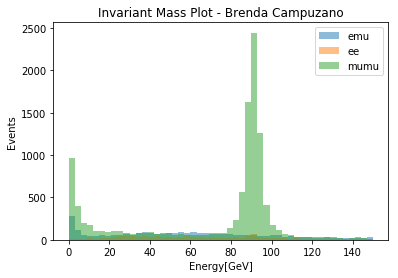

File 'same_sign.txt' does not exist, skipping
File 'opp_sign.txt' does not exist, skipping


No handles with labels found to put in legend.


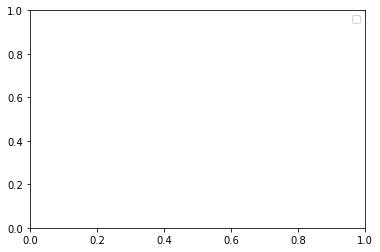

In [22]:
emin = 0
emax = 150
n_bins = 50

def get_invmass_from_data( data ):

    # invariant mass is 
    # sqrt( m1^2 + m2^2 + 2(E1*E2 + p1\dot p2) )
    m1sq = np.array([ evt[5]**2 - evt[2]**2 - evt[3]**2 - evt[4]**2  for evt in data])
    m2sq = np.array([ evt[11]**2 -evt[10]**2 -evt[9]**2 - evt[8]**2  for evt in data])
    p1dp2 = 2*np.array([ evt[11]*evt[5] - evt[2]*evt[8] - evt[3]*evt[9] - evt[4]*evt[10] for evt in data])

    invmass = np.sqrt(m1sq + m2sq + p1dp2)

    return(invmass)

def plot_files(files):

    for each in files:
        if not os.path.exists(each):
            print("File '{}' does not exist, skipping".format(each))
            continue

        # load the event
        data = np.loadtxt(each)
        invmass = get_invmass_from_data(data)

        bins = np.linspace(emin, emax, n_bins+1)

        plt.hist(invmass, bins,alpha=0.5, label=each.split(".")[0])
        plt.title("Invariant Mass Plot - Brenda Campuzano")
        plt.xlabel("Energy[GeV]")
        plt.ylabel("Events")

    plt.legend()
    plt.show()
    plt.close()

# load in flavor pairs
files_flavor = ["emu.txt", "ee.txt", "mumu.txt"]

files_sign = ["same_sign.txt", "opp_sign.txt"]

plot_files(files_flavor)
plot_files(files_sign)

In [6]:
# Try the same thing with same-sign and opposite-sign subsamples
